# Customer Churn Prediction

## Introductory Remarks

**Churn prediction** is the task of identifying whether users are likely to stop using a service, product, or website. Companies and large corprorations strive to aqcuire new customers, a process which usually requires a lot of resources in time and money, and they will do everything to prevent a customer from leaving. Acquiring a new customer is often much more costly, rather than making an offer to a client who is ready to leave. More importantly, customers rarely reveal their complaints about a service or a product they use, or their intentions of leaving a company. Therefore, it is important for companies to regularly review historical user behavior patterns and accurate forecast the probability that a given customer will churn.

Furthermore, companies usually make a distinction between **voluntary churn** and **involuntary churn**. **Voluntary churn** occurs due to a decision by the customer to switch to another company or service provider, whereas **involuntary churn** occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn *are excluded* from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Here, we are going to study the transactional data set which contains all the transactions occurring between December 1st, 2010 (01/12/2010) and December 9th, 2011 (09/12/2011) for a UK-based and registered non-store online retailer. The company mainly sells unique all-occasion gifts. The data set is provided through the [UCI Machine Learning Directory (Online Retail)](http://archive.ics.uci.edu/ml/datasets/Online+Retail), and our task will be to predict which customers are likely to churn given their purchase activity. We will assume that none of these customers has stopped buying from this non-store online retailer due to involuntary reasons, and that if some of them did was due to their intention to actually leave the company.

It is important to note that **customer churn** can be defined in many ways. In the **GraphLab Create** **`churn_predictor`** toolkit that we are going to use below, **churn** is defined to be no activity for a fixed period of time (called the **`churn_period`**). More specifically, a user is said to have churned if there is no activity for a duration of time known as the **`churn_period`** (by default, this is set to 30 days).

### Data Source / Bibliography

[Chen et. al 2012] Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

Data set has been provided from the UCI ML Repository: http://archive.ics.uci.edu/ml/datasets/Online+Retail

## Libraries and Necessary Data Transformations

First we fire up **GraphLab Create**, all the other necessary libraries and load the **`Online_Retail.csv`** data set in an **SFrame**.

In [1]:
import graphlab as gl
import graphlab.aggregate as agg
import datetime as dt

In [2]:
purchasing_data = gl.SFrame.read_csv('./../../04.UCI.ML.REPO/00352.Online_Retail/Online_Retail.csv', 
                                     column_type_hints=[str,str,str,int,str,float,str,str])

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1466145791.log
INFO:graphlab.cython.cy_server:GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1466145791.log


Finished parsing file /home/theod/Documents/ML_Home/04.UCI.ML.REPO/00352.Online_Retail/Online_Retail.csv

Parsing completed. Parsed 541909 lines in 5.18712 secs.

This non-commercial license of GraphLab Create is assigned to tgrammat@gmail.com and will expire on September 21, 2016. For commercial licensing options, visit https://dato.com/buy/.


As shown below, **`purchasing_data`** keeps the transactional data of purchases made by various customers of this online retailer during the period  from 01/12/2010 to 09/12/2011. It keeps customer records per **`InvoiceNo`** and **`StockCode`**, the **`Quantity`** and the **`UnitPrice`** of each product procured, as long as the **`InvoiceDate`** that the corresponding invoice has been issued. Customer country of residency, **`Country`**, as well as a short description of each **`StockCode`** is also provided.

In [3]:
purchasing_data.head(5)

Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	str
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 5

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|   536365  |   85123A  | WHITE HANGING HEART T-LIGH...  |    6     |
|   536365  |   71053   |      WHITE METAL LANTERN       |    6     |
|   536365  |   84406B  | CREAM CUPID HEARTS COAT HANGER |    8     |
|   536365  |   84029G  | KNITTED UNION FLAG HOT WAT...  |    6     |
|   536365  |   84029E  | RED WOOLLY HOTTIE WHITE HEART. |    6     |
+-----------+-----------+--------------------------------+----------+
+----------------+-----------+------------+----------------+
|  InvoiceDate   | UnitPrice | CustomerID |    Country     |
+----------------+-----------+------------+----------------+
| 12/1/2010 8:26 |    2.55   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    3.39   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    2.75   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    3.39   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    3.39   |   17850    | United Kingdom |
+----------------+-----------+------------+----------------+
[5 rows x 8 columns]

In [4]:
purchasing_data.dtype

<bound method SFrame.dtype of Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	str
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 541909

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|   536365  |   85123A  | WHITE HANGING HEART T-LIGH...  |    6     |
|   536365  |   71053   |      WHITE METAL LANTERN       |    6     |
|   536365  |   84406B  | CREAM CUPID HEARTS COAT HANGER |    8     |
|   536365  |   84029G  | KNITTED UNION FLAG HOT WAT...  |    6     |
|   536365  |   84029E  | RED WOOLLY HOTTIE WHITE HEART. |    6     |
|   536365  |   22752   |  SET 7 BABUSHKA NESTING BOXES  |    2     |
|   536365  |   21730   | GLASS STAR FROSTED T-LIGHT...  |    6     |
|   536366  |   22633   |     HAND WARMER UNION JACK     |    6     |
|   536366  |   22632   |   HAND WARMER RED PO

Now we need to convert the **`InvoiceDate`** (which is a string) into a **Python DateTime** object.

In [5]:
def _str_to_datetime(x):
    import datetime as dt
    try:
        return dt.datetime.strptime(x, '%m/%d/%Y %H:%M')
    except (TypeError, ValueError):
        return None

In [6]:
purchasing_data['InvoiceDate'] = purchasing_data['InvoiceDate'].apply(_str_to_datetime)
purchasing_data.head(5)

Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	datetime
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 5

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|   536365  |   85123A  | WHITE HANGING HEART T-LIGH...  |    6     |
|   536365  |   71053   |      WHITE METAL LANTERN       |    6     |
|   536365  |   84406B  | CREAM CUPID HEARTS COAT HANGER |    8     |
|   536365  |   84029G  | KNITTED UNION FLAG HOT WAT...  |    6     |
|   536365  |   84029E  | RED WOOLLY HOTTIE WHITE HEART. |    6     |
+-----------+-----------+--------------------------------+----------+
+---------------------+-----------+------------+----------------+
|     InvoiceDate     | UnitPrice | CustomerID |    Country     |
+---------------------+-----------+------------+----------------+
| 2010-12-01 08:26:00 |    2.55   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    2.75   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
+---------------------+-----------+------------+----------------+
[5 rows x 8 columns]

### Exploratory data analysis / Data Cleansing

To have a better feeling of the provided data set, we plot a univariate summary statistics as below.

In [7]:
gl.canvas.set_target('ipynb')
purchasing_data.show()

Note that some values seems peculiar in this data set. First, some records have negative **`Quantity`** and **`UnitPrice`** values, whereas some **`CustomerID`**s are missing. However, since we want to predict which customers are likely to churn, record lines with missing **`CustomerID`**s can not help our model and we should better exclude them. The **`purchasing_data`** set now becomes.

In [8]:
purchasing_data = purchasing_data[purchasing_data['CustomerID']!='']
purchasing_data.show()

Note, that no negative values in the **`UnitPrice`** attribute exist any more. Furthermore, taking a closer look in the part of the record with the negative procured **Quantities**, we can safely assume that these cases concern **product returns**, **discounts (`StockCode='D'`)** and **manual corrections (`StockCode='M'`)**. Therefore, having  a complete purchasing record per customer requires keeping all these transactions.

In [9]:
purchasing_data_neg_quantity = purchasing_data[purchasing_data['Quantity'] < 0]
purchasing_data_neg_quantity.show()

In [10]:
gl.Sketch(purchasing_data_neg_quantity['Quantity'])


+--------------------+----------------+----------+
|        item        |     value      | is exact |
+--------------------+----------------+----------+
|       Length       |      8905      |   Yes    |
|        Min         |    -80995.0    |   Yes    |
|        Max         |      -1.0      |   Yes    |
|        Mean        | -30.8599663111 |   Yes    |
|        Sum         |   -274808.0    |   Yes    |
|      Variance      | 1369108.81711  |   Yes    |
| Standard Deviation | 1170.08923468  |   Yes    |
|  # Missing Values  |       0        |   Yes    |
|  # unique values   |      134       |    No    |
+--------------------+----------------+----------+

Most frequent items:
+-------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+
| value |  -1  |  -2  |  -3 | -12 |  -6 |  -4 | -24 |  -5 | -10 |  -8 |
+-------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+
| count | 3848 | 1329 | 577 | 520 | 468 | 455 | 236 | 186 | 164 | 143 |
+-------+------+------+---

Indeed, the customer with **`CustomerID='12607'`** procured a bunch of various products on 10/10/2011 at a total cost of $1579.51 and returned all of them back canceling the previously issued Invoice (**`InvoiceNo='570467'`**) two days later. Note the **`'C'`** prefix in the **`InvoiceNo`** of the cancellation invoice. Of course, this specific customer is unlikely to make another purchase, a fact that we will miss if we drop the lines of products return. More importantly, we need to take seriously this event of complete purchase cancellation by updating appropriately the predictive model we will build.

In [11]:
purchasing_data_cust_12607 = purchasing_data.filter_by('12607', 'CustomerID')
purchasing_data_cust_12607[['InvoiceNo', 'StockCode', 'Description', 'Quantity',\
                            'InvoiceDate', 'UnitPrice', 'CustomerID']].print_rows(num_rows=205, max_row_width=110)

+-----------+-----------+--------------------------------+----------+---------------------+-----------+------------+
| InvoiceNo | StockCode |          Description           | Quantity |     InvoiceDate     | UnitPrice | CustomerID |
+-----------+-----------+--------------------------------+----------+---------------------+-----------+------------+
|   570467  |   22551   |    PLASTERS IN TIN SPACEBOY    |    12    | 2011-10-10 16:06:00 |    1.65   |   12607    |
|   570467  |   21915   |     RED  HARMONICA IN BOX      |    12    | 2011-10-10 16:06:00 |    1.25   |   12607    |
|   570467  |   22619   |   SET OF 6 SOLDIER SKITTLES    |    4     | 2011-10-10 16:06:00 |    3.75   |   12607    |
|   570467  |   22138   |  BAKING SET 9 PIECE RETROSPOT  |    3     | 2011-10-10 16:06:00 |    4.95   |   12607    |
|   570467  |   21524   | DOORMAT SPOTTY HOME SWEET HOME |    2     | 2011-10-10 16:06:00 |    8.25   |   12607    |
|   570467  |   21668   | RED STRIPE CERAMIC DRAWER KNOB |    12

In [12]:
purchasing_data_cust_12607['CostPerStockCode'] = purchasing_data_cust_12607['Quantity']\
* purchasing_data_cust_12607['UnitPrice']

purchasing_data_cust_12607.groupby(key_columns = ['InvoiceNo', 'InvoiceDate', 'CustomerID'],
                                   operations = {'Total Cost of Invoice': agg.SUM('CostPerStockCode')})\
.sort('InvoiceDate')

Columns:
	CustomerID	str
	InvoiceDate	datetime
	InvoiceNo	str
	Total Cost of Invoice	float

Rows: 2

Data:
+------------+---------------------+-----------+-----------------------+
| CustomerID |     InvoiceDate     | InvoiceNo | Total Cost of Invoice |
+------------+---------------------+-----------+-----------------------+
|   12607    | 2011-10-10 16:06:00 |   570467  |        1579.51        |
|   12607    | 2011-10-12 16:17:00 |  C570867  |        -1579.51       |
+------------+---------------------+-----------+-----------------------+
[2 rows x 4 columns]

As another example, the customer with **`CustomerID='18139'`** made a series of purchases on 11/21/2011 and the day after, 11/22/2011, at a total cost of $8393.22. Note, that among the issued invoices two of them (with **`InvoiceNo`** **`'C578073'`** and **`'C578076'`**) involved manual correction (**`StockCode='M'`**) of the paid amount. These kind of transactions may be also important to achieve better predictive performance.

In [13]:
purchasing_data_cust_18139 = purchasing_data.filter_by('18139', 'CustomerID')
purchasing_data_cust_18139['CostPerStockCode'] = purchasing_data_cust_18139['Quantity']\
* purchasing_data_cust_18139['UnitPrice']
purchasing_data_cust_18139[['InvoiceNo', 'StockCode', 'Description', 'Quantity',\
                            'InvoiceDate', 'UnitPrice', 'CustomerID']].print_rows(num_rows=170, max_row_width=110)

+-----------+-----------+--------------------------------+----------+---------------------+-----------+------------+
| InvoiceNo | StockCode |          Description           | Quantity |     InvoiceDate     | UnitPrice | CustomerID |
+-----------+-----------+--------------------------------+----------+---------------------+-----------+------------+
|   577745  |   22087   |    PAPER BUNTING WHITE LACE    |    40    | 2011-11-21 14:06:00 |    2.55   |   18139    |
|   577745  |   22046   |   TEA PARTY  WRAPPING PAPER    |    25    | 2011-11-21 14:06:00 |    0.42   |   18139    |
|   577745  |   22708   |        WRAP DOLLY GIRL         |    25    | 2011-11-21 14:06:00 |    0.42   |   18139    |
|   577745  |   23546   |       WRAP PAISLEY PARK        |    25    | 2011-11-21 14:06:00 |    0.42   |   18139    |
|   577745  |   23230   |      WRAP ALPHABET DESIGN      |    25    | 2011-11-21 14:06:00 |    0.42   |   18139    |
|   577745  |   23296   | SET OF 6 TEA TIME BAKING CASES |    24

In [14]:
purchasing_data_cust_18139['CostPerStockCode'] = purchasing_data_cust_18139['Quantity']\
* purchasing_data_cust_18139['UnitPrice']

purchasing_data_cust_18139.groupby(key_columns = ['InvoiceNo', 'InvoiceDate', 'CustomerID'],
                                   operations = {'Total Cost of Invoice': agg.SUM('CostPerStockCode')})\
.sort('InvoiceDate')

Columns:
	CustomerID	str
	InvoiceDate	datetime
	InvoiceNo	str
	Total Cost of Invoice	float

Rows: 8

Data:
+------------+---------------------+-----------+-----------------------+
| CustomerID |     InvoiceDate     | InvoiceNo | Total Cost of Invoice |
+------------+---------------------+-----------+-----------------------+
|   18139    | 2011-11-21 14:06:00 |   577745  |         461.4         |
|   18139    | 2011-11-21 14:47:00 |   577754  |        2675.28        |
|   18139    | 2011-11-21 15:53:00 |   577772  |         689.52        |
|   18139    | 2011-11-21 16:20:00 |   577783  |         2786.4        |
|   18139    | 2011-11-22 09:17:00 |   577816  |        1090.92        |
|   18139    | 2011-11-22 10:44:00 |   577845  |         734.82        |
|   18139    | 2011-11-22 16:02:00 |  C578073  |         -31.68        |
|   18139    | 2011-11-22 16:18:00 |  C578076  |         -13.44        |
+------------+---------------------+-----------+-----------------------+
[8 rows x 4 columns]

In [15]:
purchasing_data_cust_18139.groupby(key_columns = 'CustomerID',
                                   operations = {'Total Cost of Invoice': agg.SUM('CostPerStockCode')})

Columns:
	CustomerID	str
	Total Cost of Invoice	float

Rows: 1

Data:
+------------+-----------------------+
| CustomerID | Total Cost of Invoice |
+------------+-----------------------+
|   18139    |        8393.22        |
+------------+-----------------------+
[1 rows x 2 columns]

### Data Preparation for Model Training & train/test split

In this section, we are going to further prepare the **`purchasing_data`** set for the **Churn Predictor model** we are going to train.

In [16]:
purchasing_data.print_rows(num_rows=10, max_row_width=110, max_column_width=15)

+-----------+-----------+----------------+----------+----------------+-----------+------------+----------------+
| InvoiceNo | StockCode |  Description   | Quantity |  InvoiceDate   | UnitPrice | CustomerID |    Country     |
+-----------+-----------+----------------+----------+----------------+-----------+------------+----------------+
|   536365  |   85123A  | WHITE HANGI... |    6     | 2010-12-01 ... |    2.55   |   17850    | United Kingdom |
|   536365  |   71053   | WHITE METAL... |    6     | 2010-12-01 ... |    3.39   |   17850    | United Kingdom |
|   536365  |   84406B  | CREAM CUPID... |    8     | 2010-12-01 ... |    2.75   |   17850    | United Kingdom |
|   536365  |   84029G  | KNITTED UNI... |    6     | 2010-12-01 ... |    3.39   |   17850    | United Kingdom |
|   536365  |   84029E  | RED WOOLLY ... |    6     | 2010-12-01 ... |    3.39   |   17850    | United Kingdom |
|   536365  |   22752   | SET 7 BABUS... |    2     | 2010-12-01 ... |    7.65   |   17850    | 

In [17]:
purchasing_data.show()

Among the available attributes, the **`Description`** column is not going to help the model and should be excluded. Furthermore, the nominal categorical attribute **`InvoiceNo`** has too many different values (more than 22000) to be helpful for the **GraphLab Create `churn_predictor`** toolkit. However, as we saw earlier what is important in the historical purchasing record of a customer is not the specific **`InvoiceNo`** against which he/she procured some goods but the *type* of the *issued invoice*; was it a **Purchase/Standard (Invoice Receipt)** or a **Cancelling Invoice (Credit Note)**? This type in fact determines if an actual purchase happened or a product return, and our learning algorithm does not need to know anything else from this specific attribute. Therefore, we should better denote 

* all **Purchase Invoices (Invoice Receipts)** having a 6-digit **`InvoiceNo`** with an **`'IR'`** string and 
* all **Cancelling Invoices (Credit Notes)** having a C-prefixed 6-digit **`InvoiceNo`** with a **`'CN'`** string.

In [18]:
purchasing_data.remove_column('Description')
purchasing_data['InvoiceNo'] = purchasing_data['InvoiceNo'].apply(lambda x: 'CN' if 'C' in x else 'IR')
purchasing_data.print_rows(num_rows=20, max_row_width=110)

+-----------+-----------+----------+---------------------+-----------+------------+----------------+
| InvoiceNo | StockCode | Quantity |     InvoiceDate     | UnitPrice | CustomerID |    Country     |
+-----------+-----------+----------+---------------------+-----------+------------+----------------+
|     IR    |   85123A  |    6     | 2010-12-01 08:26:00 |    2.55   |   17850    | United Kingdom |
|     IR    |   71053   |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
|     IR    |   84406B  |    8     | 2010-12-01 08:26:00 |    2.75   |   17850    | United Kingdom |
|     IR    |   84029G  |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
|     IR    |   84029E  |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
|     IR    |   22752   |    2     | 2010-12-01 08:26:00 |    7.65   |   17850    | United Kingdom |
|     IR    |   21730   |    6     | 2010-12-01 08:26:00 |    4.25   |   17850    | United 

In [19]:
purchasing_data.show()

Finally, we want to separate some users into a **train/test set**, making sure the **test users** *are not* in the **training set**, and creating **TimeSeries objects** out of them.

In [20]:
(train, test) = gl.churn_predictor.random_split(purchasing_data, user_id='CustomerID', fraction=0.95, seed=1)
train_trial = gl.TimeSeries(train, index='InvoiceDate')
test_trial = gl.TimeSeries(test, index='InvoiceDate')

#### Important Notes:

1. The two parts of **`train/test`** data sets have been splitted in such a way to keep different customers (**`CustomerID`**). This is because we want our learning algorithm to be blind on the data set which we are going to use for its validation.
2. The **test** and **train sets** have identical time ranges, at least as far the calendar dates concern.

In [21]:
import numpy as np

train_customer_ids = train['CustomerID'].unique().sort().to_numpy()
test_customer_ids = test['CustomerID'].unique().sort().to_numpy()
print 'Number of same \'CustomerID\'s in test and train set: %d' %\
len(test_customer_ids[np.in1d(test_customer_ids, train_customer_ids, assume_unique=True)])

Number of same 'CustomerID's in test and train set: 0


In [22]:
print "Train Start date : %s" % train_trial.min_time
print "Train End date   : %s" % train_trial.max_time

Train Start date : 2010-12-01 08:34:00
Train End date   : 2011-12-09 12:50:00


In [23]:
print "Test Start date : %s" % test_trial.min_time
print "Test End date   : %s" % test_trial.max_time

Test Start date : 2010-12-01 08:26:00
Test End date   : 2011-12-09 12:00:00


### Loading Complementary Customer Information

Now we can load some user information, which can be used to complement the churn prediction model.

In [24]:
userdata = gl.SFrame('./userdata_sf/')
userdata

Columns:
	CustomerID	int
	Gender	str
	Age	int
	Country	str

Rows: 4380

Data:
+------------+--------+-----+----------------+
| CustomerID | Gender | Age |    Country     |
+------------+--------+-----+----------------+
|   13097    |  Male  |  57 | United Kingdom |
|   16817    |  Male  |  57 | United Kingdom |
|   14499    |  Male  |  61 | United Kingdom |
|   16185    |  Male  |  33 | United Kingdom |
|   14285    |  Male  |  33 | United Kingdom |
|   16837    |  Male  |  57 | United Kingdom |
|   13969    |  Male  |  41 | United Kingdom |
|   12831    |  Male  |  45 | United Kingdom |
|   16697    |  Male  |  57 | United Kingdom |
|   17671    |  Male  |  45 | United Kingdom |
+------------+--------+-----+----------------+
[4380 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [25]:
userdata.dtype

<bound method SFrame.dtype of Columns:
	CustomerID	int
	Gender	str
	Age	int
	Country	str

Rows: 4380

Data:
+------------+--------+-----+----------------+
| CustomerID | Gender | Age |    Country     |
+------------+--------+-----+----------------+
|   13097    |  Male  |  57 | United Kingdom |
|   16817    |  Male  |  57 | United Kingdom |
|   14499    |  Male  |  61 | United Kingdom |
|   16185    |  Male  |  33 | United Kingdom |
|   14285    |  Male  |  33 | United Kingdom |
|   16837    |  Male  |  57 | United Kingdom |
|   13969    |  Male  |  41 | United Kingdom |
|   12831    |  Male  |  45 | United Kingdom |
|   16697    |  Male  |  57 | United Kingdom |
|   17671    |  Male  |  45 | United Kingdom |
+------------+--------+-----+----------------+
[4380 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.>

We also change the **`dtype`** of the nominal categorical attribute **`CustomerID`** to **`str`**.

In [26]:
userdata['CustomerID'] = userdata['CustomerID'].astype(str)

## Training the Churn Predictor model

Here, we train the **Churn Predictor** model. We determine the **period of inactivity (`churn_period_trial`)** after which a customer will be considered as churned. Furthermore, in order to extract more signal out of the data, we choose **multiple churn boundaries** for the same users. Remember that both **train** and **test Timeseries** start from 2010-12-01 and end at 2011-12-09.

In [27]:
## churn period of inactivity
churn_period_trial = dt.timedelta(days = 30) 

## In order to extract more signal out of the data, 
## Define multiple churn boundaries for the same users. 
churn_boundary_aug = dt.datetime(year = 2011, month = 8, day = 1) 
churn_boundary_sep = dt.datetime(year = 2011, month = 9, day = 1) 
churn_boundary_oct = dt.datetime(year = 2011, month = 10, day = 1)

In [28]:
train.head(10)

Columns:
	InvoiceNo	str
	StockCode	str
	Quantity	int
	InvoiceDate	datetime
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 10

Data:
+-----------+-----------+----------+---------------------+-----------+------------+
| InvoiceNo | StockCode | Quantity |     InvoiceDate     | UnitPrice | CustomerID |
+-----------+-----------+----------+---------------------+-----------+------------+
|     IR    |   84879   |    32    | 2010-12-01 08:34:00 |    1.69   |   13047    |
|     IR    |   22745   |    6     | 2010-12-01 08:34:00 |    2.1    |   13047    |
|     IR    |   22748   |    6     | 2010-12-01 08:34:00 |    2.1    |   13047    |
|     IR    |   22749   |    8     | 2010-12-01 08:34:00 |    3.75   |   13047    |
|     IR    |   22310   |    6     | 2010-12-01 08:34:00 |    1.65   |   13047    |
|     IR    |   84969   |    6     | 2010-12-01 08:34:00 |    4.25   |   13047    |
|     IR    |   22623   |    3     | 2010-12-01 08:34:00 |    4.95   |   13047    |
|     IR    |   22622   |    2     | 2010-12-01 08:34:00 |    9.95   |   13047    |
|     IR    |   21754   |    3     | 2010-12-01 08:34:00 |    5.95   |   13047    |
|     IR    |   21755   |    3     | 2010-12-01 08:34:00 |    5.95   |   13047    |
+-----------+-----------+----------+---------------------+-----------+------------+
+----------------+
|    Country     |
+----------------+
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
| United Kingdom |
+----------------+
[10 rows x 7 columns]

In [29]:
## train the Churn Predictor model
model = gl.churn_predictor.create(train_trial,
                                  user_id = 'CustomerID',
                                  features = None,
                                  user_data = userdata,
                                  churn_period = churn_period_trial,
                                  # The time-scale/granularity at which features are computed (1 day here)
                                  time_period = dt.timedelta(1),
                                  # The various multiples of `time_period` used while computing features
                                  lookback_periods = [7, 14, 21, 60, 90],
                                  # Multiple churn boundaries to extract more signal out of data
                                  time_boundaries = [churn_boundary_aug, churn_boundary_sep, churn_boundary_oct],
                                  use_advanced_features=True)

PROGRESS: Grouping observation_data by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for time-boundary.
PROGRESS: --------------------------------------------------
PROGRESS: Features for 2011-08-01 03:00:00.
PROGRESS: Features for 2011-09-01 03:00:00.
PROGRESS: Features for 2011-10-01 03:00:00.
PROGRESS: Joining user_data with aggregated features.
PROGRESS: --------------------------------------------------
PROGRESS: Training a classifier model.

External memory mode: 1 batches

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 9712

Number of classes           : 2

Number of feature columns   : 28

Number of unpacked features : 2652

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 9.164515     | 0.780066          | 0.602425          |

| 2         | 48.141676    | 0.786862          | 0.552385          |

| 3         | 60.774367    | 0.787068          | 0.523186          |

| 4         | 63.302998    | 0.790465          | 0.504794          |

| 5         | 65.691883    | 0.793760          | 0.491921          |

| 6         | 68.056068    | 0.796026          | 0.483503          |

| 7         | 70.673983    | 0.798806          | 0.475561          |

| 8         | 72.940455    | 0.799629          | 0.470561          |

| 9         | 75.373842    | 0.800865          | 0.465407          |

| 10        | 77.765184    | 0.803233          | 0.461569          |

+-----------+--------------+-------------------+-------------------+

External memory mode: 1 batches

External memory mode: 1 batches

Decision tree regression:

--------------------------------------------------------

Number of examples          : 9712

Number of features          : 28

Number of unpacked features : 2652

Create disk column page 1/1

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 4.680920     | 0.361340           | 0.204186      |

+-----------+--------------+--------------------+---------------+


PROGRESS: --------------------------------------------------
PROGRESS: Model training complete: Next steps
PROGRESS: --------------------------------------------------
PROGRESS: (1) Evaluate the model at various timestamps in the past:
PROGRESS:       metrics = model.evaluate(data, time_in_past)
PROGRESS: (2) Make a churn forecast for a timestamp in the future:
PROGRESS:       predictions = model.predict(data, time_in_future)


### Evaluating the model (post-hoc anaylsis)

Here, we evaluate the **Churn Predictor `model`**. We choose as **evaluation time**, the last churn boundary which we defined previously.

In [30]:
# Evaluate this model in October
evaluation_time = churn_boundary_oct

In [36]:
# define cutoffs to consider
cutoffs_list = np.linspace(0.1, 1.0, num=100)
cutoffs_list = cutoffs_list.tolist()

# calculate metrics using test set
metrics = model.evaluate(test_trial, evaluation_time, user_data = userdata, cutoffs=cutoffs_list)

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 39 user(s). 


In [37]:
print(metrics)

{'auc': 0.7486547365786511, 'recall': 0.9389312977099237, 'precision': 0.7365269461077845, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-----+----+
| threshold | fpr | tpr |  p  | n  |
+-----------+-----+-----+-----+----+
|    0.0    | 1.0 | 1.0 | 131 | 61 |
|   1e-05   | 1.0 | 1.0 | 131 | 61 |
|   2e-05   | 1.0 | 1.0 | 131 | 61 |
|   3e-05   | 1.0 | 1.0 | 131 | 61 |
|   4e-05   | 1.0 | 1.0 | 131 | 61 |
|   5e-05   | 1.0 | 1.0 | 131 | 61 |
|   6e-05   | 1.0 | 1.0 | 131 | 61 |
|   7e-05   | 1.0 | 1.0 | 131 | 61 |
|   8e-05   | 1.0 | 1.0 | 131 | 61 |
|   9e-05   | 1.0 | 1.0 | 131 | 61 |
+-----------+-----+-----+-----+----+
[100001 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'evaluation_data': Columns:
	CustomerID	str
	probability	float
	label	int

Rows: 192

Data:
+------------+----------------+-------+
| Custom

In [38]:
def plot_pr_curve(precision, recall, title):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = 7, 5
    plt.plot(precision, recall, 'g-', linewidth=2.0)
    plt.plot(precision, recall, 'bo')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
def plot_roc_curve(fpr, tpr, title):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = 7, 5
    plt.plot(fpr, tpr, 'g-', linewidth=2.0)
    plt.title(title)
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.rcParams.update({'font.size': 16})

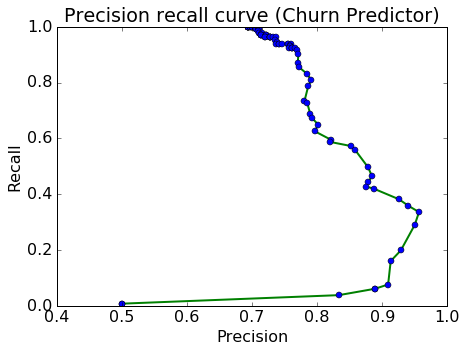

In [39]:
%matplotlib inline

precision_all = metrics['precision_recall_curve']['precision']
recall_all = metrics['precision_recall_curve']['recall']
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (Churn Predictor)')

AUC: 0.74865


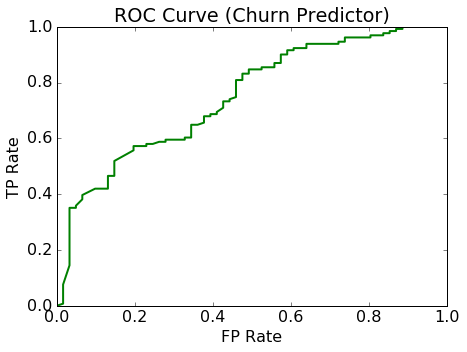

In [40]:
%matplotlib inline

fpr = metrics['roc_curve']['fpr']
tpr = metrics['roc_curve']['tpr']
plot_roc_curve(fpr, tpr, 'ROC Curve (Churn Predictor)')
print 'AUC: %.5f' % metrics['auc']

Of course, there is enough room for improvement if we carefully tweak the hyperparameters of the **boosted trees classifier** which is the underlying classifier of the **GraphLab Create `churn_predictor`** ML toolkit. 

One can even obtain an interactive overview of the trained model as evaluated on the **test set** as shown below. For details, consult [Dato's User Guide for Chrurn Prediction Models](https://dato.com/learn/userguide/churn_prediction/using-a-trained-model.html).

In [41]:
overview = model.views.overview(test_trial, evaluation_time, user_data=userdata)

[WARNING] graphlab.toolkits.churn_predictor._churn_predictor: This feature is currently in beta. Please use with caution and not in mission-critical applications. For feedback or suggestions on this feature, please e-mail feedback@dato.com.


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 39 user(s). 

External memory mode: 1 batches


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 39 user(s). 
PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.
PROGRESS: Not enough data to make predictions for 39 user(s). 


In [42]:
overview.show()

## Make predictions in the future

The goal of a **churn prediction model** is to predict the probability that a user has no activity for a **`churn_period`** of time in the future. First, we set a specific time (**`prediction_time`**) at which the predictions must be made. Then we can obtain the desired predictions by calling the **`.predict()`** method of the trained model.

In [43]:
prediction_time = dt.datetime(2011, 9, 1)
predictions = model.predict(test_trial, time_boundary=prediction_time, user_data=userdata)
predictions.print_rows()

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-09-01 00:00:00
PROGRESS:  End   : 2011-10-01 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-09-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 60 user(s). 
+------------+-----------------+
| CustomerID |   probability   |
+------------+-----------------+
|   14997    |  0.711190640926 |
|   13211    |  0.889613032341 |
|   13235    |  0.782270908356 |
|   17287    |  0.746277153492 |
|   14213    |  0.889613032341 |
|   17367    |  0.831745862961 |
|   17625    |  0.691181957722 |
|   12427    |  0.941513776779 |
|   13089    | 0.0421136878431 |
|   13291    |  0.67051833868  |
+------------+-----------------+
[231 rows x 2 columns]



To get the 20 most probable customers to churn.

In [44]:
predictions.sort('probability', ascending=False).print_rows(num_rows=20)

+------------+----------------+
| CustomerID |  probability   |
+------------+----------------+
|   15332    | 0.941513776779 |
|   12427    | 0.941513776779 |
|   17324    | 0.921824157238 |
|   12944    | 0.919493913651 |
|   14270    | 0.917038917542 |
|   18106    | 0.89918243885  |
|   17594    | 0.892392218113 |
|   17438    | 0.89202439785  |
|   17855    | 0.889613032341 |
|   15351    | 0.889613032341 |
|   13747    | 0.889613032341 |
|   13369    | 0.889613032341 |
|   15545    | 0.889613032341 |
|   13211    | 0.889613032341 |
|   14150    | 0.889613032341 |
|   17496    | 0.889613032341 |
|   14213    | 0.889613032341 |
|   17701    | 0.888489246368 |
|   17783    | 0.884413003922 |
|   13126    | 0.876144051552 |
+------------+----------------+
[231 rows x 2 columns]



**Note:**

During the predictions process, you may get a message
```
Not enough data to make predictions for 60 user(s).
```
as happens above. This might happen for several reasons. Some of which are:

* The user did not have *any activity* before the **`prediction_time`**.
* The user did not have *any activity* during any of the **`lookback_periods`** (periods of time used during the feature engineering process). The model looks at the usage history in the recent past to make a forecast. If no activity was present during this recent past, then predictions cannot be made. A prediction of **`'None'`** is returned in this case.

### Explaining predictions

One can also obtain explanations about why the model made a specific prediction. This can be obtained by calling the **`.explain()`** method of the trained model as below.

In [45]:
explanations = model.explain(test_trial, time_boundary=prediction_time, user_data=userdata)

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-09-01 00:00:00
PROGRESS:  End   : 2011-10-01 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-09-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 60 user(s). 

External memory mode: 1 batches

To obtain the list of customers with a probability higher than 90% to churn:

In [46]:
print explanations[explanations['probability'] > 0.9]

+------------+----------------+-------------------------------+
| CustomerID |  probability   |          explanation          |
+------------+----------------+-------------------------------+
|   12427    | 0.941513776779 | [No days with an event in ... |
|   15332    | 0.941513776779 | [No days with an event in ... |
|   17324    | 0.921824157238 | [No days with an event in ... |
|   12944    | 0.919493913651 | [No days with an event in ... |
|   14270    | 0.917038917542 | [No days with an event in ... |
+------------+----------------+-------------------------------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


To get the explanation returned by the model for the **`CustomerID='12427'`**  lets say:

In [47]:
def get_explanation(cust_id, explanations):
    print 'Churn Explanation for CustomerID: %s' % cust_id
    print '------------------------------------------'
    for explanation in explanations[explanations['CustomerID']==cust_id]['explanation'][0]:
        print explanation

In [48]:
get_explanation('12427', explanations)

Churn Explanation for CustomerID: 12427
------------------------------------------
No days with an event in the last 90 days
No events in feature "Quantity" in the last 90 days
Greater than (or equal to) 233.00 days since most recent event


And if we want to obtain the list of customers with probability greater than 50% to churn but less than 60%:

In [49]:
print explanations[(explanations['probability'] > 0.5) & (explanations['probability'] < 0.6)]

+------------+----------------+-------------------------------+
| CustomerID |  probability   |          explanation          |
+------------+----------------+-------------------------------+
|   15265    | 0.597162008286 | [No "Germany" events in fe... |
|   16326    | 0.512421011925 | [Less than 4.00 days with ... |
|   15220    | 0.556756198406 | [No "Belgium" events in fe... |
|   13870    | 0.556705534458 | [Less than 4.00 days with ... |
|   13524    | 0.581858932972 | [No "Belgium" events in fe... |
|   13925    | 0.540957450867 | [No "Germany" events in fe... |
|   13435    | 0.589027345181 | [Sum of "Quantity" in the ... |
+------------+----------------+-------------------------------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


Assuming we want to get a greater insight for the **`CustomerID='15265'`** we can make the call:

In [50]:
get_explanation('15265', explanations)

Churn Explanation for CustomerID: 15265
------------------------------------------
No "Germany" events in feature "Country" in the last 90 days
Max of "Quantity" in the last 90 days greater than (or equal to) 175.00
Less than 3.00 days with an event in the last 90 days
A corrected average of "Quantity" in the last 90 days greater than (or equal to) 1.07
Less than 2.00 days with "IR" events in feature "InvoiceNo" in the last 90 days
Sum of "UnitPrice" in the last 90 days greater than (or equal to) 47.63


It is remarkable to note how different from before is the explanation returned for this case.

Finally, one can even obtain a a detailed churn report which clusters the users into segments depending on the probability and the reason for churn.

In [51]:
report = model.get_churn_report(test_trial, time_boundary=prediction_time, user_data=userdata)

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-09-01 00:00:00
PROGRESS:  End   : 2011-10-01 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.


PROGRESS: Generating features for boundary 2011-09-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 60 user(s). 

External memory mode: 1 batches

The detailed churn report as returned by the model we trained, but sorted in a descending average probability is enlisted below. It consists of 32 different segments (**`segment_id`**) of customers depending on their average probability (**`avg_probability`**) to churn and the reasoning (**`explanation`**) that this might happen. The model also returns the specific **`CustomerID`**s per customer segment.

In [52]:
report.sort('avg_probability', ascending=False).print_rows(num_rows=35, max_row_width=110)

+------------+-----------+----------------------+-------------------------------+-----------------+
| segment_id | num_users | num_users_percentage |          explanation          | avg_probability |
+------------+-----------+----------------------+-------------------------------+-----------------+
|     4      |     14    |    8.18713450292     | [No days with an event in ... |  0.903421559504 |
|     0      |     29    |    16.9590643275     | [No days with an event in ... |  0.860942330854 |
|     2      |     17    |    9.94152046784     | [Between 125.00 and 150.00... |  0.842077125521 |
|     9      |     4     |    2.33918128655     | [No events in the last 90 ... |  0.820906028152 |
|     19     |     2     |    1.16959064327     | [Less than 3.00 days with ... |  0.819766670465 |
|     3      |     14    |    8.18713450292     | [No events in feature "Qua... |  0.786522056375 |
|     15     |     3     |    1.75438596491     | [Less than 3.00 days with ... |  0.773875812689 |


Finally, lets take a closer look in the event log of a customer who has been predicted with high probability to churn. More specifically, lets check the timeseries of events of **`CustomerID='13211'`** as found in the **`segment_id='4'`** of **`test_trial`** set and had predicted with an **`avg_probability = 0.903421559504`** to churn.

In [53]:
eventlog_cust_13211 = test_trial.filter_by('13211', 'CustomerID')
eventlog_cust_13211.print_rows(num_rows=60, max_row_width=100)

+---------------------+-----------+-----------+----------+-----------+------------+----------------+
|     InvoiceDate     | InvoiceNo | StockCode | Quantity | UnitPrice | CustomerID |    Country     |
+---------------------+-----------+-----------+----------+-----------+------------+----------------+
| 2010-12-13 16:17:00 |     IR    |   21210   |    6     |    1.45   |   13211    | United Kingdom |
| 2010-12-13 16:17:00 |     IR    |   22086   |    40    |    2.55   |   13211    | United Kingdom |
| 2011-09-05 17:36:00 |     IR    |   23232   |    25    |    0.42   |   13211    | United Kingdom |
| 2011-09-05 17:36:00 |     IR    |   23231   |    25    |    0.42   |   13211    | United Kingdom |
| 2011-09-05 17:36:00 |     IR    |   23549   |    25    |    0.42   |   13211    | United Kingdom |
| 2011-09-05 17:36:00 |     IR    |   21498   |    25    |    0.42   |   13211    | United Kingdom |
| 2011-09-05 17:36:00 |     IR    |   21495   |    25    |    0.42   |   13211    | United 

Note that this specific customer (with **`CustomerID='13211'`**) has bought a large number of products on September 5th, 2011 and on November 29th of the same year, but she finally ends her relationship with the online retailer. The explanation returned by the model for all the 14 customers who were found in **`segment_id='4'`** in the report above was:

In [54]:
report[report['segment_id']=='4']['explanation'][0]

['No days with an event in the last 90 days',
 'No events in feature "Quantity" in the last 90 days',
 'Greater than (or equal to) 233.00 days since most recent event']

## Accessing the model details: Engineered Underlying Features

To obtain a rough summary of the trained **Churn Predictor `model`**:

In [55]:
model.trained_model

Class                         : BoostedTreesClassifier

Schema
------
Number of examples            : 9712
Number of feature columns     : 28
Number of unpacked features   : 2652
Number of classes             : 2

Settings
--------
Number of trees               : 10
Max tree depth                : 6
Training time (sec)           : 82.2142
Training accuracy             : 0.8032
Validation accuracy           : None
Training log_loss             : 0.4616
Validation log_loss           : None

To get the training data after feature engineering:

In [56]:
train_data = model.processed_training_data
train_data.print_rows(max_row_width=100)

+-----------------------------+-----------------------------+-----------------------------+
|    InvoiceNo||features||7   |    Quantity||features||7    |    UnitPrice||features||7   |
+-----------------------------+-----------------------------+-----------------------------+
| {'user_timesinceseen': 195} | {'user_timesinceseen': 195} | {'user_timesinceseen': 195} |
|  {'user_timesinceseen': 53} |  {'user_timesinceseen': 53} |  {'user_timesinceseen': 53} |
| {'user_timesinceseen': 118} | {'user_timesinceseen': 118} | {'user_timesinceseen': 118} |
| {'user_timesinceseen': 180} | {'user_timesinceseen': 180} | {'user_timesinceseen': 180} |
| {'user_timesinceseen': 132} | {'user_timesinceseen': 132} | {'user_timesinceseen': 132} |
|  {'user_timesinceseen': 74} |  {'user_timesinceseen': 74} |  {'user_timesinceseen': 74} |
| {'user_timesinceseen': 102} | {'user_timesinceseen': 102} | {'user_timesinceseen': 102} |
|  {'user_timesinceseen': 84} |  {'user_timesinceseen': 84} |  {'user_timesinces

Finally, to obtain the most important features for this model:

In [57]:
model_feature_importance = model.trained_model.get_feature_importance()
print model_feature_importance

+-------------------------+--------------------+-------+
|           name          |       index        | count |
+-------------------------+--------------------+-------+
|  InvoiceNo||features||7 | user_timesinceseen |   77  |
|           Age           |        None        |   29  |
| InvoiceNo||features||90 |  count||IR||slope  |   11  |
|  Quantity||features||7  |      sum||sum      |   10  |
|  Quantity||features||90 |      sum||sum      |   10  |
|  Quantity||features||60 |     sum||slope     |   9   |
| UnitPrice||features||60 |      sum||sum      |   7   |
|  Quantity||features||60 |      sum||sum      |   7   |
|  Quantity||features||60 |     sum||ratio     |   7   |
|         Country         |   United Kingdom   |   7   |
+-------------------------+--------------------+-------+
[2686 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [58]:
gl.canvas.set_target('ipynb')
model_feature_importance['name'].show()

For details of how the  **GraphLab Create Churn Prediction toolkit** works, consult [Dato's User Guide for Churn Prediction toolkit internals](https://dato.com/learn/userguide/churn_prediction/how-it-works.html) and the [Dato Blog, Posted by Antoine Atallah](http://blog.dato.com/churn-prediction-with-log-data), Software Engineer and Data Scientist at Dato. Details for the API functionality which is currently available can be found in the corresponding [GraphLab Create API Documentation](https://dato.com/products/create/docs/graphlab.toolkits.churn_predictor.html).